In [1]:
# Here first we will import all our necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Now we will import our dataset using pandas
add_df = pd.read_csv("Advertising.csv")

In [3]:
add_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Here is all the info about our dataset and datatypes
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
##These are all the statistical information we need for observation
add_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# As we can see here there are no null blocks in our data
add_df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
#Just selecting the useful columns
add_df = add_df[['TV','Radio','Newspaper','Sales']]

In [8]:
add_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
#This is the shape of our dataset
add_df.shape

(200, 4)

In [10]:
#These are all the unique columns in our dataset
add_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

C:\Users\synda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


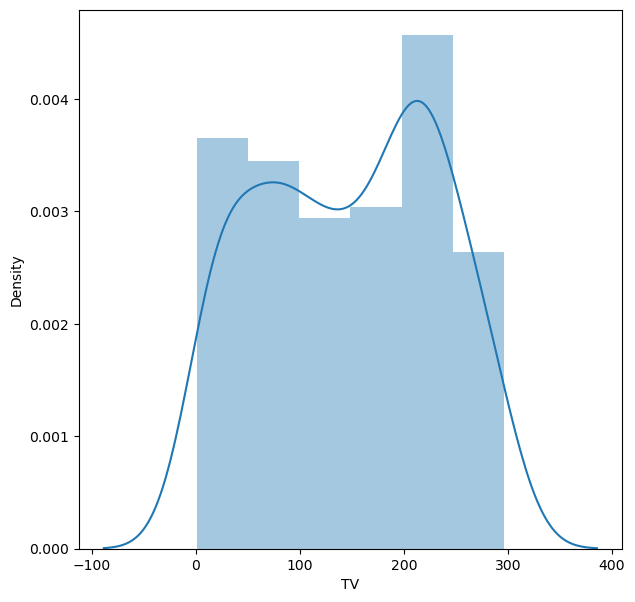

In [11]:
#TV distribution plot

plt.figure(figsize=(7,7))
sns.distplot(add_df['TV'])
plt.show()

C:\Users\synda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


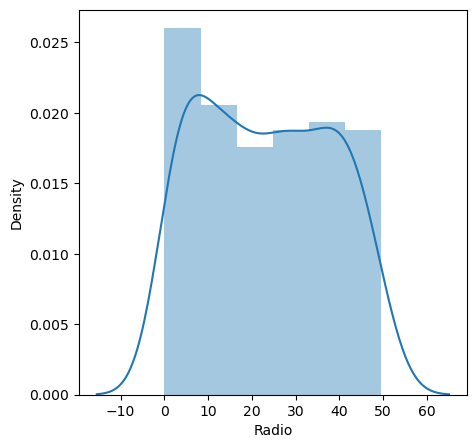

In [12]:
#Radio distribution plot

plt.figure(figsize=(5,5))
sns.distplot(add_df['Radio'])
plt.show()

C:\Users\synda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


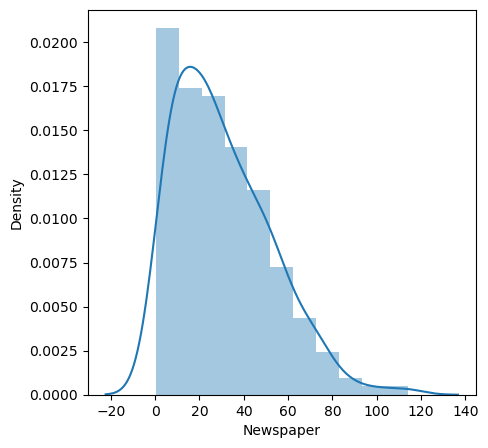

In [13]:
#Newspaper distribution plot

plt.figure(figsize=(5,5))
sns.distplot(add_df['Newspaper'])
plt.show()

C:\Users\synda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


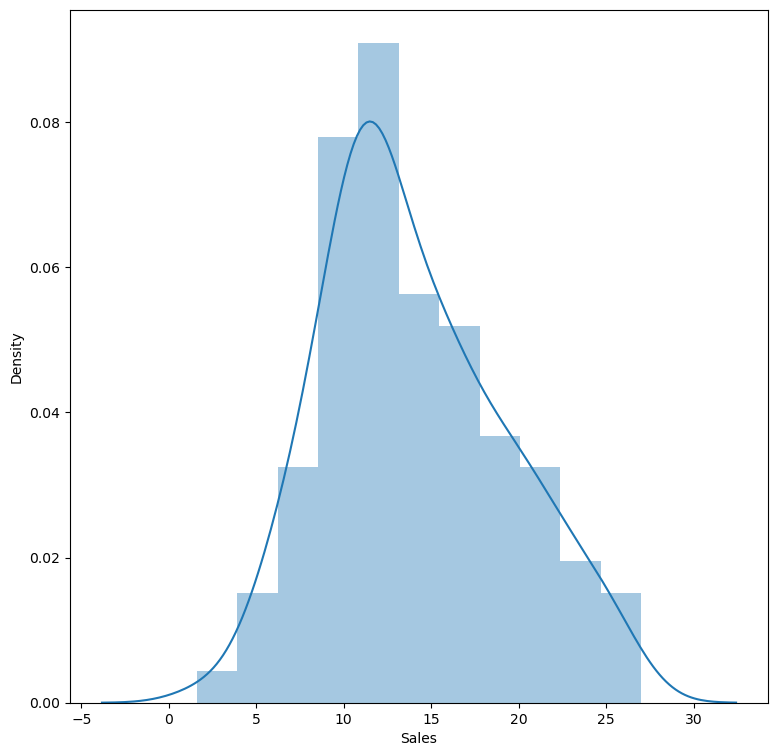

In [14]:
# Sales distribution plot

plt.figure(figsize=(9,9))
sns.distplot(add_df['Sales'])
plt.show()

<AxesSubplot:>

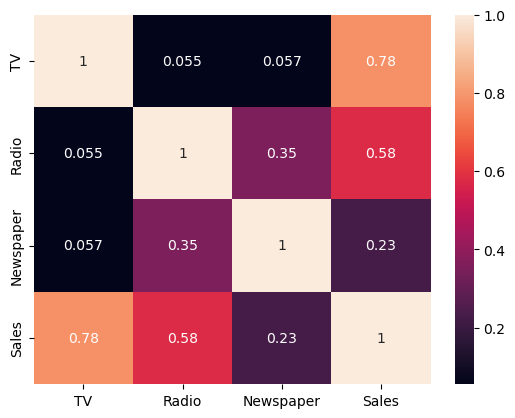

In [15]:
#Visual representation of our correlation matrix

correlation=add_df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [23]:
#Now selecting our target and train dataset
X = add_df.drop(['Sales'],axis = 1)
y = add_df.Sales

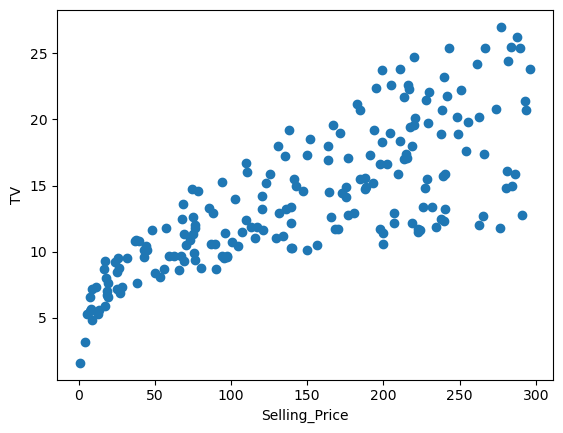

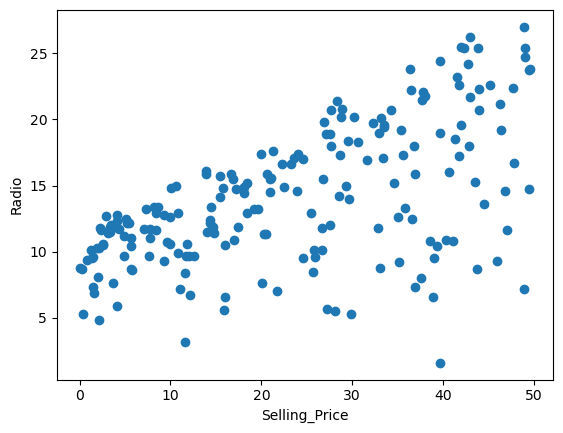

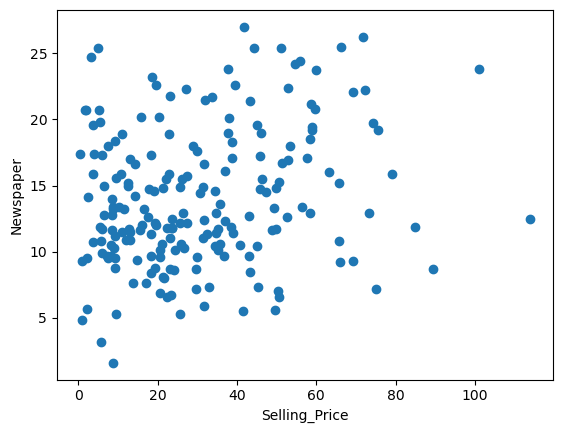

<Figure size 640x480 with 0 Axes>

In [17]:
#These are all the scatter plot which we will use for determining our regression model
plt.scatter(X.TV, y)
plt.xlabel('Selling_Price')
plt.ylabel('TV')
fig1 = plt.figure()
plt.scatter(X.Radio, y)
plt.xlabel('Selling_Price')
plt.ylabel('Radio')
fig2 = plt.figure()
plt.scatter(X.Newspaper, y)
plt.xlabel('Selling_Price')
plt.ylabel('Newspaper')
fig3 = plt.figure()
plt.show()

In [18]:
#Now split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.8,test_size=0.2,random_state=0)

In [19]:
#Now for more accurate and logical model formation we will import cross validation
from sklearn.model_selection import cross_val_score

In [20]:
##Now we will write a function to apply our algorithm and also our cross validation
cv = 5
CV = [] 

def model(algorithm,x_train,y_target,x_test,y_target_test): 
    algorithm.fit(x_train,y_target)
    predicts=algorithm.predict(x_test)
    prediction=pd.DataFrame(predicts)
    cross_val=cross_val_score(algorithm,x_train,y_target,cv=cv)
    
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
     # Plot for prediction vs originals
    test_index=y_target_test.reset_index()["Sales"]
    ax=test_index.plot(label="Original",figsize=(15,8),linewidth=2,color="r")
    ax=prediction[0].plot(label = "Prediction",figsize=(15,8),linewidth=2,color="b")
    plt.legend()
    plt.title("Original VS Prediction")
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.show()

CV scores: [0.90270468 0.8954621  0.93098802 0.89102412 0.87239359] 

CV scores mean: 0.8985145014718592


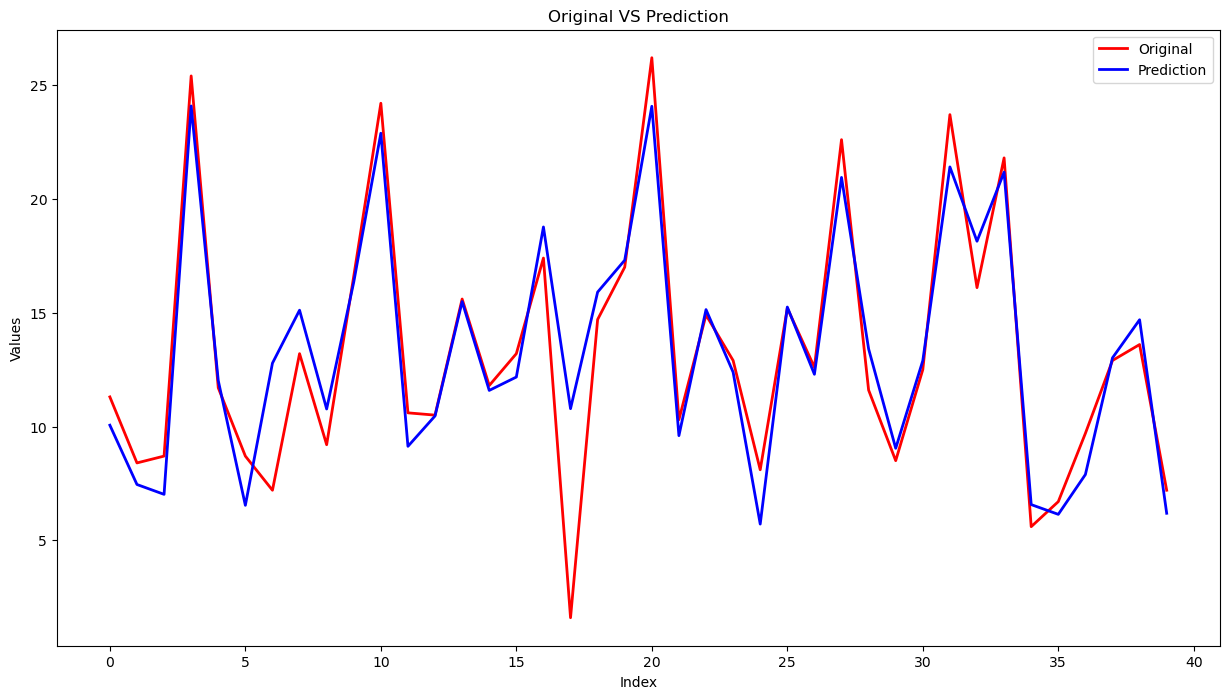

In [21]:
#Now we will use linear regression so we will import it from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

#Here we also formed our graph to show our difference between predicted and original data

In [25]:
#Here these are our predicted values according to the X_test
y_pred = lr.predict(X_test)
y_pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])